In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/california_housing_train.csv')

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


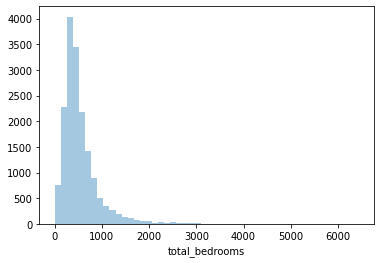

In [ ]:
sns.distplot(df['total_bedrooms'], kde=False)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [ ]:
# min max scaler
mm = MinMaxScaler()#feature_range=(-1,1))
df['total_bedrooms_mm'] = mm.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


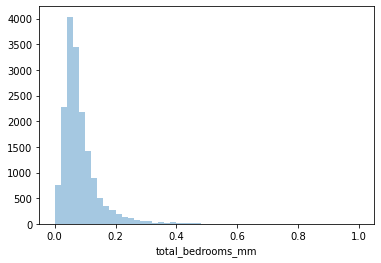

In [ ]:
sns.distplot(df['total_bedrooms_mm'], kde=False)

In [ ]:
# standard scaler
ss = StandardScaler()
df['total_bedrooms_ss'] = ss.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


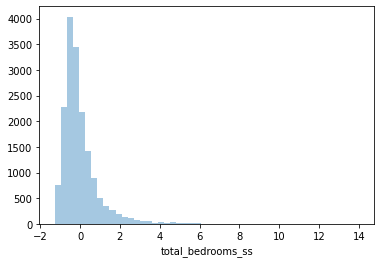

In [ ]:
sns.distplot(df['total_bedrooms_ss'], kde=False)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_mm,total_bedrooms_ss
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,1.700000e+04
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,0.083552,1.571553e-16
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,0.065410,1.000029e+00
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,-1.277408e+00
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,0.045934,-5.751323e-01
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,0.067194,-2.500927e-01
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,0.100442,2.582266e-01
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.401132e+01


In [ ]:
# Robust scaler (outliers)
rs = RobustScaler()
df['total_bedrooms_rs'] = rs.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


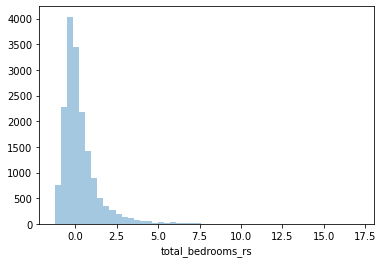

In [ ]:
sns.distplot(df['total_bedrooms_rs'], kde=False)

In [ ]:
# Box-cox
bc = PowerTransformer(method='box-cox')
df['total_bedrooms_bc'] = bc.fit_transform(np.array(df['total_bedrooms']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


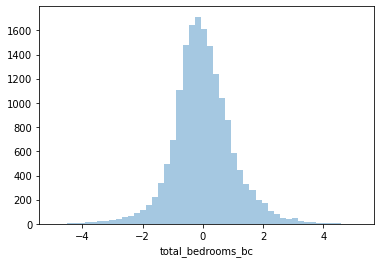

In [ ]:
sns.distplot(df['total_bedrooms_bc'], kde=False)

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_mm,total_bedrooms_ss,total_bedrooms_rs,total_bedrooms_bc
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.198945,1.764204,2.417082,1.696275
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.294848,3.230441,4.176512,2.437964
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.026847,-0.866956,-0.740214,-1.241779
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.052142,-0.480230,-0.276157,-0.405203
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.050435,-0.506328,-0.307473,-0.450088


In [ ]:
bc.inverse_transform(np.array(df['total_bedrooms_bc']).reshape(-1,1))

array([[1283.],
       [1901.],
       [ 174.],
       ...,
       [ 531.],
       [ 552.],
       [ 300.]])

In [ ]:
### Como aplicar este tipo de transformação com dados de treinamento e teste?
# 1- Aplicar a transformação no treinamento ( e ao mesmo tempo, aprender parametros internos)
# 2- Aplucar a transformação no teste (reaproveitando os parametros)

In [ ]:
df.drop(['total_bedrooms_mm','total_bedrooms_ss', 'total_bedrooms_rs','total_bedrooms_bc'], axis=1, inplace=True)

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# dividindo em treino e teste
df_treino = df[:10000]
df_teste = df[10001:]

In [ ]:
# minmaxscaler e depois box-cox

In [ ]:
mm = MinMaxScaler(feature_range=(1,2))
bc = PowerTransformer(method='box-cox')

In [ ]:
# ''aprendendo'' min-max scaler
mm.fit(df_treino)

MinMaxScaler(copy=True, feature_range=(1, 2))

In [ ]:
# transformar a base com o min-max
df_treino_mm = mm.transform(df_treino)

In [ ]:
df_treino_mm

array([[2.        , 1.2754591 , 1.26      , ..., 1.09061114, 1.06853009,
        1.10701193],
       [1.97069597, 1.31051753, 1.34      , ..., 1.08887604, 1.09104012,
        1.13422831],
       [1.95421245, 1.19198664, 1.3       , ..., 1.02217081, 1.07937822,
        1.14577466],
       ...,
       [1.        , 1.70116861, 1.98      , ..., 1.04819742, 1.19396974,
        1.11360984],
       [1.        , 1.70116861, 1.96      , ..., 1.05378832, 1.09426077,
        1.09855836],
       [1.        , 1.69949917, 1.86      , ..., 1.04395604, 1.08848154,
        1.07752752]])

In [ ]:
# df_treino_mm

In [ ]:
# aprender o box-cox
bc.fit(df_treino_mm)

PowerTransformer(copy=True, method='box-cox', standardize=True)

In [ ]:
# aplicar o box-cox
df_treino_mm_bc = bc.transform(df_treino_mm)

In [ ]:
###### Agora vamos aplicar o mesmo processo nos dados de TESTE
###### CUIDADO: vamos apenas usar o TRANSFORM (fit não pode ser usado!)

In [ ]:
df_teste_mm = mm.transform(df_teste)

In [ ]:
df_teste_mm_bc = bc.transform(df_teste_mm)

In [ ]:
# Motivo de não dar fit novamente:
# o Fit ele "aprende" como a transformação deve ser feita
# então digamos que usamos fit nos dados treinamento e aprendemos uma transformação
# se aplicamos fit novamente nos dados de teste, é possível que a nova transformação 
# aprendida, desta vez, nos dados de teste, não tenha nada a ver com a anterior

In [ ]:
# Exemplo do MinMax Scaler: 
# Treinamento: [0, 100] -> [0,1] -> 0 antes = 0 depois, 100 antes -> 1 depois
# Teste: apareceu um valor de 250: como fica isso transformado?
#        valor resultado: 2,5

### Missing data

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
100 * df.isna().sum() / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# começando pela cabine
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# Opções:
1- Remover a coluna e simplesmente aceitar que estou perdendo 23% dos dados (focando na coluna).

2- Substituir os valores faltantes por um valor fixo (UNK, unknown).

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Caso fosse remover a coluna:
# df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Substituir valores faltantes por um valor fixo na coluna Cabin
df['Cabin'] = df['Cabin'].replace(np.nan, 'UNK')
# df['Cabin'].fillna('UNK', inplace=True)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S


In [ ]:
100 * df.isna().sum() / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.000000
Embarked        0.224467
dtype: float64

In [ ]:
# Pensando em Age (idade)
# Aprox. 20% de faltantes
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].mode()

0    24.0
dtype: float64

In [ ]:
# fillna
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
# Imputação de acordo com o sexo!
# Como que podemos fazer isso?

# apply? -> SIM
# loc -> Pesquisar como substituir valores usando o loc!

In [ ]:
100 * df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.224467
dtype: float64

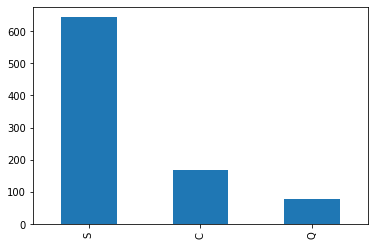

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
# Moda
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### missingpy

In [ ]:
!pip install missingpy

     |████████████████████████████████| 49 kB 5.8 MB/s 


In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/titanic.csv')

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# apagando colunas de texto
df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
from missingpy import KNNImputer
# from missingpy import MissForest

In [ ]:
imputer = KNNImputer()
df_knn_imp = imputer.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [ ]:
df_knn_imp

array([[  1.    ,   0.    ,   3.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])